API

In [0]:
import numpy as np

np.random.seed(213)

def affine_forward(X, W, b):
    V = np.dot(X, W) + b
    return V

def affine_backward(dout, X, W, b):
    dX = np.dot(dout, W.T)
    dW = np.dot(X.T, dout)
    db = np.sum(dout, axis=0, keepdims=True)
    return dX,dW,db

def sigmoid_forward(V):
    act = 1/(1+np.exp(-V))
    return act

def sigmoid_backward(dout,act):
    dact = act-act**2
    dout = dout*dact
    return dout

Single Layer

In [0]:
def train_single_layer(X, y, lr, max_epoch, weights=None, history=None):
    n_data, n_dim = X.shape
    _, n_out = y.shape

    if weights is None:
        W1 = 2 * np.random.random((n_dim, n_out)) - 1
        b1 = np.zeros((1, n_out))
        history = []
    else:
        W1, b1 = weights
    
    for ep in range(max_epoch):
        V1 = affine_forward(X, W1, b1)
        y_hat = sigmoid_forward(V1)

        E = y-y_hat
        mse = np.mean(E**2)
        history.append(mse)

        acc = np.sum(y == np.round(y_hat))/n_data
        print('epoch: %i/%i, mse: %.7f, acc: %.2f' % (ep, max_epoch, mse, acc))

        dV1 = sigmoid_backward(E, y_hat)
        dX, dW1, db1 = affine_backward(dV1, X, W1, b1)

        W1 = W1 + lr*dW1
        b1 = b1 + lr*db1

    weights = (W1, b1)

    return history, weights

In [3]:
x = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0, 0, 0, 1]]).T

print(x)
print(y)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0]
 [0]
 [0]
 [1]]


In [4]:
hist1, model1 = train_single_layer(x, y, lr=1, max_epoch=10)

epoch: 0/10, mse: 0.2638224, acc: 0.75
epoch: 1/10, mse: 0.2346801, acc: 0.75
epoch: 2/10, mse: 0.2150581, acc: 0.50
epoch: 3/10, mse: 0.2006311, acc: 0.50
epoch: 4/10, mse: 0.1891835, acc: 0.50
epoch: 5/10, mse: 0.1795470, acc: 0.75
epoch: 6/10, mse: 0.1710935, acc: 0.75
epoch: 7/10, mse: 0.1634854, acc: 0.75
epoch: 8/10, mse: 0.1565404, acc: 0.75
epoch: 9/10, mse: 0.1501555, acc: 0.75


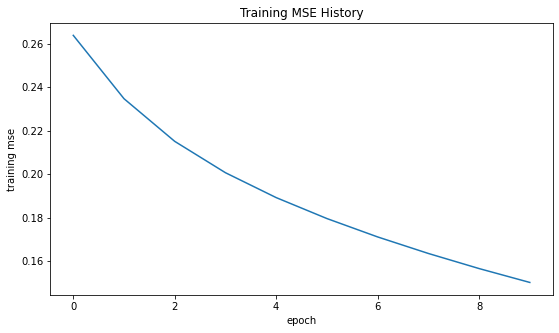

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_graph(history, size=[9,5]):
    plt.rcParams['figure.figsize'] = size
    plt.plot(history)
    plt.xlabel('epoch')
    plt.ylabel('training mse')
    plt.title('Training MSE History')
    plt.show()

show_graph(hist1)

In [6]:
def test_single_layer(x, weights):
    W1, b1 = weights
    V1 = affine_forward(x, W1, b1)
    y_hat = sigmoid_forward(V1)

    return np.round(y_hat)

y_pred = test_single_layer(x, model1)
print(y_pred)

[[0.]
 [0.]
 [0.]
 [0.]]


In [7]:
hist1, model1 = train_single_layer(x, y, lr=1, max_epoch=10, weights=model1, history=hist1)

epoch: 0/10, mse: 0.1442652, acc: 0.75
epoch: 1/10, mse: 0.1388212, acc: 0.75
epoch: 2/10, mse: 0.1337823, acc: 0.75
epoch: 3/10, mse: 0.1291113, acc: 1.00
epoch: 4/10, mse: 0.1247738, acc: 1.00
epoch: 5/10, mse: 0.1207381, acc: 1.00
epoch: 6/10, mse: 0.1169752, acc: 1.00
epoch: 7/10, mse: 0.1134591, acc: 1.00
epoch: 8/10, mse: 0.1101662, acc: 1.00
epoch: 9/10, mse: 0.1070754, acc: 1.00


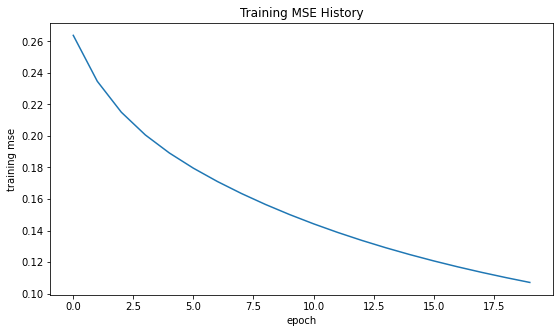

In [8]:
show_graph(hist1)

In [9]:
y_pred = test_single_layer(x, model1)
print(y_pred)

[[0.]
 [0.]
 [0.]
 [1.]]


Two Layer Neural Net

In [0]:
def train_two_layers(x, y, n_hidden, lr, max_epoch, weights=None, history=None, print_every=10):
    n_data, n_dim = x.shape
    _, n_out = y.shape

    if weights is None:
        W1 = 2 * np.random.random((n_dim, n_hidden)) - 1
        b1 = np.zeros((1, n_hidden))
        W2 = 2 * np.random.random((n_hidden, n_out)) - 1
        b2 = np.zeros((1, n_out))
        history = []
    else:
        W1, b1, W2, b2 = weights

    for ep in range(max_epoch):

        V1 = affine_forward(x, W1, b1)
        A1 = sigmoid_forward(V1)
        V2 = affine_forward(A1, W2, b2)
        y_hat = sigmoid_forward(V2)

        E = y-y_hat
        mse = np.mean(E**2)
        history.append(mse)

        if ep % print_every == 0:
            acc = np.sum(y == np.round(y_hat))/n_data
            print('epoch: %i/%i, mse: %.7f, acc: %.2f' % (ep, max_epoch, mse, acc))

        dV2 = sigmoid_backward(E, y_hat)
        dA1, dW2, db2 = affine_backward(dV2, A1, W2, b2)
        dV1 = sigmoid_backward(dA1, A1)
        dX, dW1, db1 = affine_backward(dV1, x, W1, b1)

        W1 += lr*dW1
        b1 += lr*db1
        W2 += lr*dW2
        b2 += lr*db2

    weights = (W1, b1, W2, b2)

    return history, weights

In [0]:
def test_two_layers(x, weights):
    W1, b1, W2, b2 = weights

    V1 = affine_forward(x, W1, b1)
    A1 = sigmoid_forward(V1)
    V2 = affine_forward(A1, W2, b2)
    y_hat = sigmoid_forward(V2)

    return np.round(y_hat)

In [12]:
y = np.array([[0, 1, 1, 0]]).T
print(y)

[[0]
 [1]
 [1]
 [0]]


In [13]:
hist2, model2 = train_two_layers(x, y, n_hidden=4, lr=1, max_epoch=100, print_every=10)

epoch: 0/100, mse: 0.2640017, acc: 0.50
epoch: 10/100, mse: 0.2492536, acc: 0.50
epoch: 20/100, mse: 0.2489319, acc: 0.50
epoch: 30/100, mse: 0.2485521, acc: 0.50
epoch: 40/100, mse: 0.2480849, acc: 0.50
epoch: 50/100, mse: 0.2474926, acc: 0.50
epoch: 60/100, mse: 0.2467255, acc: 0.50
epoch: 70/100, mse: 0.2457167, acc: 0.50
epoch: 80/100, mse: 0.2443771, acc: 0.50
epoch: 90/100, mse: 0.2425900, acc: 0.50


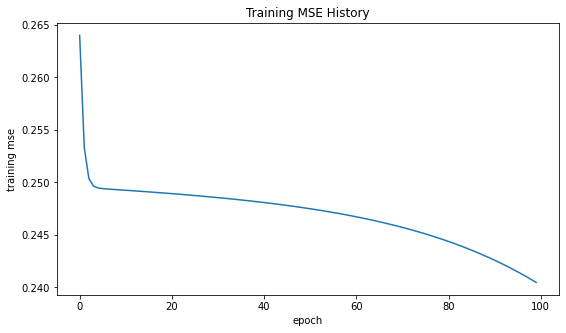

In [14]:
show_graph(hist2)

In [15]:
y_pred = test_two_layers(x, model2)
print(y_pred)

[[0.]
 [0.]
 [1.]
 [0.]]


In [16]:
hist2, model2 = train_two_layers(x, y, n_hidden=4, lr=1, max_epoch=300, print_every=10, weights=model2, history=hist2)

epoch: 0/300, mse: 0.2402083, acc: 0.75
epoch: 10/300, mse: 0.2370567, acc: 0.75
epoch: 20/300, mse: 0.2329436, acc: 0.75
epoch: 30/300, mse: 0.2276865, acc: 0.75
epoch: 40/300, mse: 0.2211480, acc: 0.75
epoch: 50/300, mse: 0.2132695, acc: 0.75
epoch: 60/300, mse: 0.2040762, acc: 0.75
epoch: 70/300, mse: 0.1936402, acc: 0.75
epoch: 80/300, mse: 0.1820211, acc: 0.75
epoch: 90/300, mse: 0.1692346, acc: 0.75
epoch: 100/300, mse: 0.1552918, acc: 0.75
epoch: 110/300, mse: 0.1403064, acc: 1.00
epoch: 120/300, mse: 0.1246102, acc: 1.00
epoch: 130/300, mse: 0.1087884, acc: 1.00
epoch: 140/300, mse: 0.0935747, acc: 1.00
epoch: 150/300, mse: 0.0796446, acc: 1.00
epoch: 160/300, mse: 0.0674351, acc: 1.00
epoch: 170/300, mse: 0.0570899, acc: 1.00
epoch: 180/300, mse: 0.0485209, acc: 1.00
epoch: 190/300, mse: 0.0415115, acc: 1.00
epoch: 200/300, mse: 0.0358041, acc: 1.00
epoch: 210/300, mse: 0.0311521, acc: 1.00
epoch: 220/300, mse: 0.0273426, acc: 1.00
epoch: 230/300, mse: 0.0242020, acc: 1.00
epo

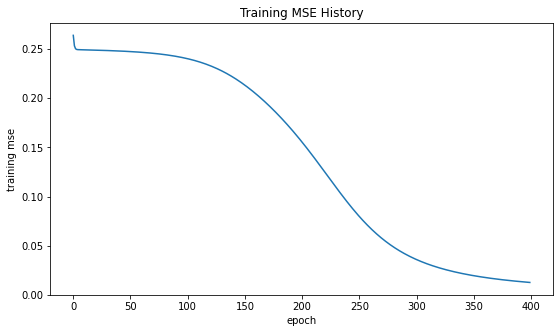

In [17]:
show_graph(hist2)

In [18]:
y_pred = test_two_layers(x, model2)
print(y_pred)

[[0.]
 [1.]
 [1.]
 [0.]]


Learning Rate

In [19]:
hist3, model3 = train_two_layers(x, y, n_hidden=4, lr=0.1, max_epoch=400, print_every=50)

epoch: 0/400, mse: 0.2585459, acc: 0.50
epoch: 50/400, mse: 0.2495192, acc: 0.25
epoch: 100/400, mse: 0.2492035, acc: 0.50
epoch: 150/400, mse: 0.2489999, acc: 0.50
epoch: 200/400, mse: 0.2487770, acc: 0.50
epoch: 250/400, mse: 0.2485283, acc: 0.50
epoch: 300/400, mse: 0.2482483, acc: 0.50
epoch: 350/400, mse: 0.2479308, acc: 0.50


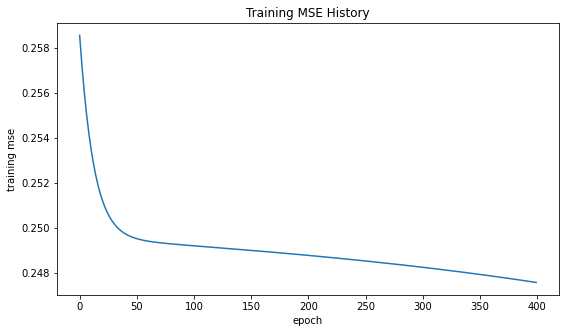

In [20]:
show_graph(hist3)

In [21]:
y_pred = test_two_layers(x, model3)
print(y_pred)

[[0.]
 [0.]
 [1.]
 [1.]]


In [22]:
hist3, model3 = train_two_layers(x, y, n_hidden=4, lr=0.1, max_epoch=3000, weights=model3, history=hist3, print_every=100)

epoch: 0/3000, mse: 0.2475686, acc: 0.50
epoch: 100/3000, mse: 0.2466781, acc: 0.50
epoch: 200/3000, mse: 0.2455027, acc: 0.50
epoch: 300/3000, mse: 0.2439575, acc: 0.50
epoch: 400/3000, mse: 0.2419530, acc: 0.50
epoch: 500/3000, mse: 0.2394044, acc: 0.50
epoch: 600/3000, mse: 0.2362408, acc: 0.50
epoch: 700/3000, mse: 0.2324124, acc: 0.75
epoch: 800/3000, mse: 0.2279000, acc: 0.75
epoch: 900/3000, mse: 0.2227292, acc: 0.75
epoch: 1000/3000, mse: 0.2169853, acc: 0.75
epoch: 1100/3000, mse: 0.2108138, acc: 0.75
epoch: 1200/3000, mse: 0.2043949, acc: 0.75
epoch: 1300/3000, mse: 0.1978977, acc: 0.75
epoch: 1400/3000, mse: 0.1914389, acc: 0.75
epoch: 1500/3000, mse: 0.1850638, acc: 0.75
epoch: 1600/3000, mse: 0.1787523, acc: 0.75
epoch: 1700/3000, mse: 0.1724359, acc: 0.75
epoch: 1800/3000, mse: 0.1660158, acc: 0.75
epoch: 1900/3000, mse: 0.1593750, acc: 0.75
epoch: 2000/3000, mse: 0.1523914, acc: 0.75
epoch: 2100/3000, mse: 0.1449560, acc: 0.75
epoch: 2200/3000, mse: 0.1370012, acc: 0.75


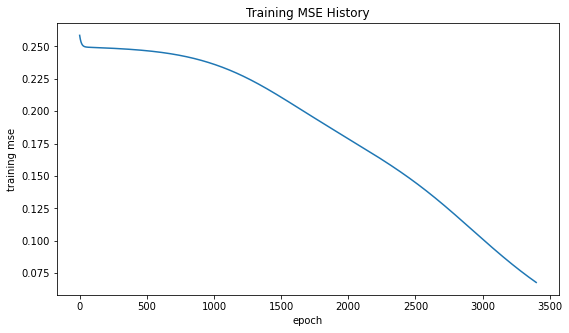

In [23]:
show_graph(hist3)

In [24]:
y_pred = test_two_layers(x, model3)
print(y_pred)

[[0.]
 [1.]
 [1.]
 [0.]]


Bigger Dataset

In [0]:
from sklearn.datasets import make_classification

COLORS = ['red','blue']
DIM = 20
INFO = 10
CLASS = 2
NDATA = 600

xb, yb1 = make_classification(n_samples=NDATA, n_classes=CLASS, n_features=DIM,
                               n_informative=INFO, n_clusters_per_class=4, flip_y=0.2, random_state=33)

yb = yb1.reshape((-1,1))

In [0]:
from mpl_toolkits.mplot3d import Axes3D

ft = [0, 1, 2]

fig = plt.figure(figsize=(10,6), dpi=100)
ax = Axes3D(fig)
ax.scatter(xb[yb1 == 0, ft[0]], xb[yb1 == 0, ft[1]], xb[yb1 == 0, ft[2]], c=COLORS[0], marker='s')
ax.scatter(xb[yb1 == 1, ft[0]], xb[yb1 == 1, ft[1]], xb[yb1 == 1, ft[2]], c=COLORS[1], marker='o')
plt.show()

In [27]:
hist4, model4 = train_two_layers(xb, yb, n_hidden=4, lr=1, max_epoch=500, print_every=25)

epoch: 0/500, mse: 0.2334994, acc: 0.66
epoch: 25/500, mse: 0.2610825, acc: 0.73
epoch: 50/500, mse: 0.1920981, acc: 0.80
epoch: 75/500, mse: 0.2046450, acc: 0.79
epoch: 100/500, mse: 0.2049841, acc: 0.79
epoch: 125/500, mse: 0.1888821, acc: 0.81
epoch: 150/500, mse: 0.2448439, acc: 0.72
epoch: 175/500, mse: 0.1798076, acc: 0.82
epoch: 200/500, mse: 0.2088887, acc: 0.79
epoch: 225/500, mse: 0.1943314, acc: 0.81
epoch: 250/500, mse: 0.1757954, acc: 0.82
epoch: 275/500, mse: 0.1894328, acc: 0.80
epoch: 300/500, mse: 0.1979738, acc: 0.80
epoch: 325/500, mse: 0.1816506, acc: 0.81
epoch: 350/500, mse: 0.1796211, acc: 0.81
epoch: 375/500, mse: 0.1901934, acc: 0.81
epoch: 400/500, mse: 0.1742755, acc: 0.82
epoch: 425/500, mse: 0.1727423, acc: 0.82
epoch: 450/500, mse: 0.1678859, acc: 0.83
epoch: 475/500, mse: 0.1730088, acc: 0.82


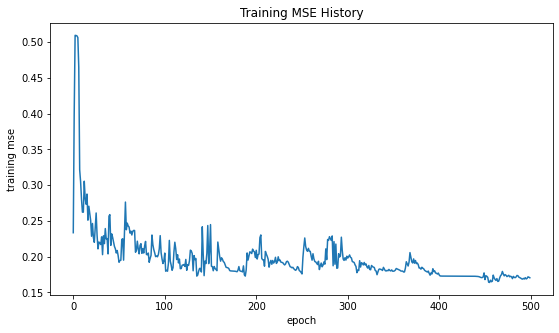

In [28]:
show_graph(hist4)

In [29]:
hist5, model5 = train_two_layers(xb, yb, n_hidden=4, lr=0.01, max_epoch=500, print_every=25)

epoch: 0/500, mse: 0.2997655, acc: 0.49
epoch: 25/500, mse: 0.1991747, acc: 0.70
epoch: 50/500, mse: 0.1797586, acc: 0.73
epoch: 75/500, mse: 0.1730770, acc: 0.74
epoch: 100/500, mse: 0.1681590, acc: 0.75
epoch: 125/500, mse: 0.1640930, acc: 0.78
epoch: 150/500, mse: 0.1604234, acc: 0.79
epoch: 175/500, mse: 0.1565332, acc: 0.79
epoch: 200/500, mse: 0.1522875, acc: 0.80
epoch: 225/500, mse: 0.1483178, acc: 0.81
epoch: 250/500, mse: 0.1449093, acc: 0.81
epoch: 275/500, mse: 0.1423353, acc: 0.83
epoch: 300/500, mse: 0.1402975, acc: 0.83
epoch: 325/500, mse: 0.1385816, acc: 0.83
epoch: 350/500, mse: 0.1370762, acc: 0.83
epoch: 375/500, mse: 0.1357297, acc: 0.83
epoch: 400/500, mse: 0.1345301, acc: 0.84
epoch: 425/500, mse: 0.1334740, acc: 0.84
epoch: 450/500, mse: 0.1325456, acc: 0.84
epoch: 475/500, mse: 0.1317220, acc: 0.84


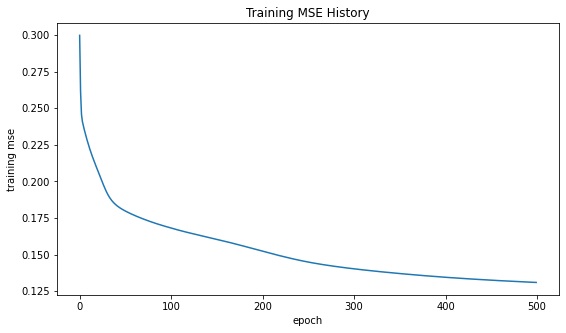

In [30]:
show_graph(hist5)

Layer Size

In [31]:
hist6, model6 = train_two_layers(xb, yb, n_hidden=20, lr=0.01, max_epoch=500, print_every=25)

epoch: 0/500, mse: 0.3294168, acc: 0.48
epoch: 25/500, mse: 0.1686224, acc: 0.77
epoch: 50/500, mse: 0.1569501, acc: 0.80
epoch: 75/500, mse: 0.1480754, acc: 0.80
epoch: 100/500, mse: 0.1396221, acc: 0.81
epoch: 125/500, mse: 0.1307213, acc: 0.83
epoch: 150/500, mse: 0.1217637, acc: 0.84
epoch: 175/500, mse: 0.1131142, acc: 0.86
epoch: 200/500, mse: 0.1050355, acc: 0.88
epoch: 225/500, mse: 0.0976778, acc: 0.89
epoch: 250/500, mse: 0.0907733, acc: 0.90
epoch: 275/500, mse: 0.0841007, acc: 0.92
epoch: 300/500, mse: 0.0780866, acc: 0.93
epoch: 325/500, mse: 0.0726096, acc: 0.94
epoch: 350/500, mse: 0.0676016, acc: 0.94
epoch: 375/500, mse: 0.0630964, acc: 0.95
epoch: 400/500, mse: 0.0590285, acc: 0.95
epoch: 425/500, mse: 0.0553896, acc: 0.95
epoch: 450/500, mse: 0.0521023, acc: 0.96
epoch: 475/500, mse: 0.0490492, acc: 0.96


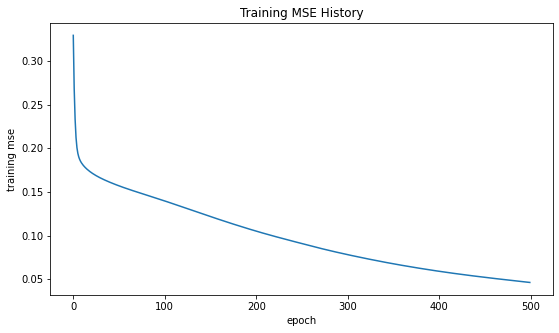

In [32]:
show_graph(hist6)

In [0]:
def show_n_graph(histories, names, size=[9,5]):
    plt.rcParams['figure.figsize'] = size
    for i in range(len(histories)):
        plt.plot(histories[i], label=names[i])
    plt.xlabel('epoch')
    plt.ylabel('training mse')
    plt.title('Training MSE History')
    plt.legend()
    plt.show()

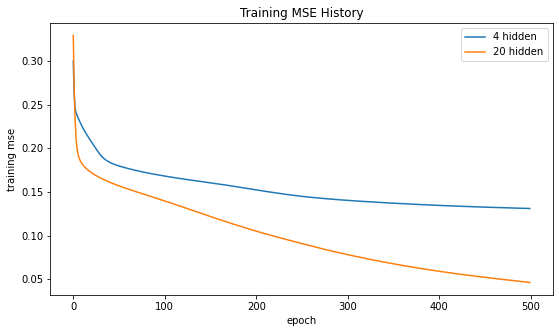

In [34]:
show_n_graph([hist5, hist6], ['4 hidden', '20 hidden'])

Full Batch Gradient Descent

In [35]:
W1, b1, W2, b2 = model6
print('size data train = ', xb.shape, ': ', xb.nbytes, 'byte')
print('size weight W1  = ', W1.shape, ': ', W1.nbytes, 'byte')
print('size weight b1  = ', b1.shape, ': ', b1.nbytes, 'byte')
print('size weight W2  = ', W2.shape, ': ', W2.nbytes, 'byte')
print('size weight b2  = ', b2.shape, ': ', b2.nbytes, 'byte')

size data train =  (600, 20) :  96000 byte
size weight W1  =  (20, 20) :  3200 byte
size weight b1  =  (1, 20) :  160 byte
size weight W2  =  (20, 1) :  160 byte
size weight b2  =  (1, 1) :  8 byte


In [36]:
V1 = affine_forward(xb, W1, b1)
A1 = sigmoid_forward(V1)
V2 = affine_forward(A1, W2, b2)
y_hat = sigmoid_forward(V2)

print('size weight A1    = ', A1.shape, ': ', A1.nbytes, 'byte')
print('size weight y_hat = ', y_hat.shape, ': ', y_hat.nbytes, 'byte')

size weight A1    =  (600, 20) :  96000 byte
size weight y_hat =  (600, 1) :  4800 byte


In [37]:
E = yb-y_hat

dV2 = sigmoid_backward(E, y_hat)
dA1, dW2, db2 = affine_backward(dV2, A1, W2, b2)
dV1 = sigmoid_backward(dA1, A1)
dx, dW1, db1 = affine_backward(dV1, xb, W1, b1)

print('size loss matrix = ', E.shape, ': ', E.nbytes, 'byte')
print('size gradient A1 = ', dA1.shape, ': ', dA1.nbytes, 'byte')
print('size gradient W1 = ', dW1.shape, ': ', dW1.nbytes, 'byte')
print('size gradient b1 = ', db1.shape, ': ', db1.nbytes, 'byte')
print('size gradient W2 = ', dW2.shape, ': ', dW2.nbytes, 'byte')
print('size gradient b2 = ', db2.shape, ': ', db2.nbytes, 'byte')

size loss matrix =  (600, 1) :  4800 byte
size gradient A1 =  (600, 20) :  96000 byte
size gradient W1 =  (20, 20) :  3200 byte
size gradient b1 =  (1, 20) :  160 byte
size gradient W2 =  (20, 1) :  160 byte
size gradient b2 =  (1, 1) :  8 byte


In [38]:
total_memory = (
    xb.nbytes + W1.nbytes + W2.nbytes +
    b1.nbytes + b2.nbytes + A1.nbytes +
    y_hat.nbytes + E.nbytes + dA1.nbytes +
    dW1.nbytes + dW2.nbytes + db1.nbytes + db2.nbytes
)

print('total memory for 1 epoch = ', total_memory/1000, 'KB')

total memory for 1 epoch =  304.656 KB


Stochastic Gradient Descent

In [0]:
from sklearn.utils import shuffle

def train_two_layers_sgd(x, y, n_hidden, lr, max_epoch, weights=None, history=None, print_every=10):
    n_data, n_dim = x.shape
    _, n_out = y.shape

    if weights is None:
        W1 = 2 * np.random.random((n_dim, n_hidden)) - 1
        b1 = np.zeros((1, n_hidden))
        W2 = 2 * np.random.random((n_hidden, n_out)) - 1
        b2 = np.zeros((1, n_out))
        history = []
    else:
        W1, b1, W2, b2 = weights

    for ep in range(max_epoch):
        x, y = shuffle(x,y)

        for i in range(n_data):
            xs = x[i].reshape(1,-1)
            ys = y[i]

            V1 = affine_forward(xs, W1, b1)
            A1 = sigmoid_forward(V1)
            V2 = affine_forward(A1, W2, b2)
            y_hat = sigmoid_forward(V2)

            E = ys-y_hat

            dV2 = sigmoid_backward(E, y_hat)
            dA1, dW2, db2 = affine_backward(dV2, A1, W2, b2)
            dV1 = sigmoid_backward(dA1, A1)
            dxs, dW1, db1 = affine_backward(dV1, xs, W1, b1)

            W2 += lr*dW2
            b2 += lr*db2
            W1 += lr*dW1
            b1 += lr*db1

        y_hat = test_two_layers(x, (W1, b1, W2, b2))
        E = y-y_hat
        mse = np.mean(E**2)
        history.append(mse)

        if ep % print_every == 0:
            acc = np.sum(y == np.round(y_hat))/n_data
            print('epoch: %i/%i, mse: %.7f, acc: %.2f' % (ep, max_epoch, mse, acc))
    
    weights = (W1, b1, W2, b2)
    return history, weights

In [40]:
hist7, model7 = train_two_layers(xb, yb, n_hidden=20, lr=0.01, max_epoch=500, print_every=50)

epoch: 0/500, mse: 0.3613175, acc: 0.49
epoch: 50/500, mse: 0.1639014, acc: 0.76
epoch: 100/500, mse: 0.1379615, acc: 0.82
epoch: 150/500, mse: 0.1178979, acc: 0.85
epoch: 200/500, mse: 0.1001414, acc: 0.88
epoch: 250/500, mse: 0.0850847, acc: 0.90
epoch: 300/500, mse: 0.0733375, acc: 0.93
epoch: 350/500, mse: 0.0633156, acc: 0.94
epoch: 400/500, mse: 0.0548100, acc: 0.96
epoch: 450/500, mse: 0.0480004, acc: 0.97


In [41]:
hist8, model8 = train_two_layers_sgd(xb, yb, n_hidden=20, lr=0.01, max_epoch=500, print_every=50)

epoch: 0/500, mse: 0.4750000, acc: 0.53
epoch: 50/500, mse: 0.2233333, acc: 0.78
epoch: 100/500, mse: 0.1950000, acc: 0.81
epoch: 150/500, mse: 0.1550000, acc: 0.84
epoch: 200/500, mse: 0.1233333, acc: 0.88
epoch: 250/500, mse: 0.0983333, acc: 0.90
epoch: 300/500, mse: 0.0800000, acc: 0.92
epoch: 350/500, mse: 0.0700000, acc: 0.93
epoch: 400/500, mse: 0.0533333, acc: 0.95
epoch: 450/500, mse: 0.0433333, acc: 0.96


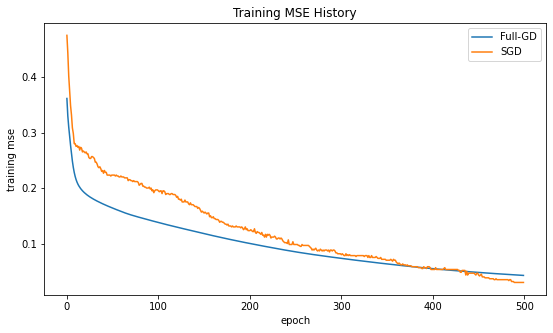

In [42]:
show_n_graph([hist7, hist8], ['Full-GD', 'SGD'])

Mini-batch Gradient Descent

In [0]:
def train_two_layers_minibatch(x, y, n_hidden, lr, max_epoch, batch, weights=None, history=None, print_every=10):
    n_data, n_dim = x.shape
    _, n_out = y.shape
    n_batch = n_data//batch

    if weights is None:
        W1 = 2 * np.random.random((n_dim, n_hidden)) - 1
        b1 = np.zeros((1, n_hidden))
        W2 = 2 * np.random.random((n_hidden, n_out)) - 1
        b2 = np.zeros((1, n_out))
        history = []
    else:
        W1, b1, W2, b2 = weights

    for ep in range(max_epoch):
        x, y = shuffle(x,y)
        xb = x.reshape((batch, n_batch, n_dim))
        yb = y.reshape((batch, -1))

        for i in range(xb.shape[0]):
            xs = xb[i]
            ys = yb[i].reshape(1,-1).T

            V1 = affine_forward(xs, W1, b1)
            A1 = sigmoid_forward(V1)
            V2 = affine_forward(A1, W2, b2)
            y_hat = sigmoid_forward(V2)

            E = ys-y_hat

            dV2 = sigmoid_backward(E, y_hat)
            dA1, dW2, db2 = affine_backward(dV2, A1, W2, b2)
            dV1 = sigmoid_backward(dA1, A1)
            dxs, dW1, db1 = affine_backward(dV1, xs, W1, b1)

            W2 += lr*dW2
            b2 += lr*db2
            W1 += lr*dW1
            b1 += lr*db1
            
        y_hat = test_two_layers(x, (W1, b1, W2, b2))
        E = y-y_hat
        mse = np.mean(E**2)
        history.append(mse)

        if ep % print_every == 0:
            acc = np.sum(y == np.round(y_hat))/n_data
            print('epoch: %i/%i, mse: %.7f, acc: %.2f' % (ep, max_epoch, mse, acc))
    
    weights = (W1, b1, W2, b2)
    return history, weights

In [44]:
hist9, model9 = train_two_layers_minibatch(xb, yb, n_hidden=20, lr=0.01, max_epoch=500, batch=10, print_every=10)

epoch: 0/500, mse: 0.4166667, acc: 0.58
epoch: 10/500, mse: 0.2950000, acc: 0.70
epoch: 20/500, mse: 0.2483333, acc: 0.75
epoch: 30/500, mse: 0.2266667, acc: 0.77
epoch: 40/500, mse: 0.2166667, acc: 0.78
epoch: 50/500, mse: 0.2200000, acc: 0.78
epoch: 60/500, mse: 0.2066667, acc: 0.79
epoch: 70/500, mse: 0.1966667, acc: 0.80
epoch: 80/500, mse: 0.1950000, acc: 0.81
epoch: 90/500, mse: 0.1850000, acc: 0.81
epoch: 100/500, mse: 0.1816667, acc: 0.82
epoch: 110/500, mse: 0.1766667, acc: 0.82
epoch: 120/500, mse: 0.1733333, acc: 0.83
epoch: 130/500, mse: 0.1666667, acc: 0.83
epoch: 140/500, mse: 0.1583333, acc: 0.84
epoch: 150/500, mse: 0.1450000, acc: 0.85
epoch: 160/500, mse: 0.1383333, acc: 0.86
epoch: 170/500, mse: 0.1350000, acc: 0.86
epoch: 180/500, mse: 0.1316667, acc: 0.87
epoch: 190/500, mse: 0.1216667, acc: 0.88
epoch: 200/500, mse: 0.1183333, acc: 0.88
epoch: 210/500, mse: 0.1116667, acc: 0.89
epoch: 220/500, mse: 0.1050000, acc: 0.90
epoch: 230/500, mse: 0.1033333, acc: 0.90
epo

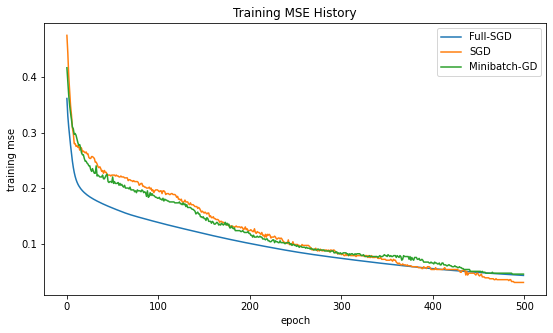

In [45]:
show_n_graph([hist7, hist8, hist9], ['Full-SGD', 'SGD', 'Minibatch-GD'])